In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
apps = pd.read_csv('googleplaystore.csv')

In [3]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Let's decide what's important for business

Firstly, we are interested in rating and installs as target variables. We also would like to get some insights about other features' relations, but rating and installs are the most important for business in the first place. If we realease our app, we'd like to get as much downloads as possible with the highest rating as well.

Thus we will investigate what affects rating and app installs

##### Hypotheses:  
Category distribution  
App ratings across categories - One-Way ANOVA  
App prices distribution  
Paid and Free apps installs  
Explore correlations  
Build regression model for rating  
Paid vs Free apps rating  
Install by Category  
Content Rating distribution + installs  
Content Rating vs Rating  
Most expensive categories  
App size vs Rating  
Rating vs Installs  
Rating vs Reviews

# Cleaning and Formatting Data

In [4]:
# info about our data
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
apps.App.describe()

count      10841
unique      9660
top       ROBLOX
freq           9
Name: App, dtype: object

Not all apps are unique in this dataset. We have to do smth with this

In [6]:
pd.DataFrame(apps.groupby('App').App.count().loc[apps.groupby('App').App.count() > 1])\
    .rename(columns={'App': 'Count'}).reset_index().sort_values(by='Count', ascending=False)

,App,Count
570,ROBLOX,9
102,"CBS Sports App - Scores, News, Stats & Watch Live",8
211,Duolingo: Learn Languages Free,7
218,ESPN,7
6,8 Ball Pool,7
...,...,...
301,Golfshot: Golf GPS + Tee Times,2
302,Google,2
305,Google Analytics,2
311,Google Duo - High Quality Video Calls,2


798 apps with appearing more than 1 time

In [7]:
apps[apps.App == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [8]:
apps[apps.App == 'Google']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3234,Google,TOOLS,4.4,8033493,Varies with device,"1,000,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
4150,Google,TOOLS,4.4,8021623,Varies with device,"1,000,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device


We can see that duplicates differ only in number of reviews, and on a small amount. So I'll drop duplicates leaving the version with the most reviews

In [9]:
apps.drop_duplicates(subset=['App'], keep='first', inplace=True)

In [10]:
apps[apps.App == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [11]:
apps.App.describe()

count                                               9660
unique                                              9660
top       Photo Editor & Candy Camera & Grid & ScrapBook
freq                                                   1
Name: App, dtype: object

In [12]:
apps['Android Ver'].describe()

count           9657
unique            33
top       4.1 and up
freq            2202
Name: Android Ver, dtype: object

I'll drop "Current Ver", "Last Updated", and "Android Ver" columns. Version of app and Last Updated are useless, Android Ver is not very informative

In [13]:
apps.drop(columns=['Current Ver', 'Android Ver', 'Last Updated'], inplace=True)

As for Reviews, we could create Reviews/Installs feature to check which apps have more reviews, but since we don't know anything about reviews content, this information seems useless for business, thus I'll remove Reviews column

In [14]:
apps.drop(columns=['Reviews'], inplace=True)

In [15]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Size            9660 non-null   object 
 4   Installs        9660 non-null   object 
 5   Type            9659 non-null   object 
 6   Price           9660 non-null   object 
 7   Content Rating  9659 non-null   object 
 8   Genres          9660 non-null   object 
dtypes: float64(1), object(8)
memory usage: 754.7+ KB


Looks like Rating, Type, and Content Rating have null values

In [16]:
apps.Rating.isnull().sum()

1463

In [17]:
apps[apps.Rating.isnull()]

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure
113,Wrinkles and rejuvenation,BEAUTY,NaN,5.7M,"100,000+",Free,0,Everyone 10+,Beauty
123,Manicure - nail design,BEAUTY,NaN,3.7M,"50,000+",Free,0,Everyone,Beauty
126,Skin Care and Natural Beauty,BEAUTY,NaN,7.4M,"100,000+",Free,0,Teen,Beauty
129,"Secrets of beauty, youth and health",BEAUTY,NaN,2.9M,"10,000+",Free,0,Mature 17+,Beauty
...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,82M,"10,000+",Free,0,Everyone,Medical
10825,Naruto & Boruto FR,SOCIAL,NaN,7.7M,100+,Free,0,Teen,Social
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation
10835,FR Forms,BUSINESS,NaN,9.6M,10+,Free,0,Everyone,Business


More than 10% of our data has NaN rating. Will will predict these samples' rating later

In [18]:
test = apps[apps.Rating.isnull()]

In [19]:
test.head()

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure
113,Wrinkles and rejuvenation,BEAUTY,NaN,5.7M,"100,000+",Free,0,Everyone 10+,Beauty
123,Manicure - nail design,BEAUTY,NaN,3.7M,"50,000+",Free,0,Everyone,Beauty
126,Skin Care and Natural Beauty,BEAUTY,NaN,7.4M,"100,000+",Free,0,Teen,Beauty
129,"Secrets of beauty, youth and health",BEAUTY,NaN,2.9M,"10,000+",Free,0,Mature 17+,Beauty


In [20]:
apps.drop(apps[apps.Rating.isnull()].index, inplace=True)

In [21]:
apps[apps.Type.isnull()]

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres


Since the price is 0, I'll replace Nan with "Free"

In [22]:
apps.loc[apps.Type.isnull(), 'Type'] = 'Free'

In [23]:
apps[apps['Content Rating'].isnull()]

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,"1,000+",Free,0,Everyone,NaN,"February 11, 2018"


App's category is missing and features' values are all in wrong columns. I'll just delete this app

In [24]:
apps.drop(apps.loc[apps.App == 'Life Made WI-Fi Touchscreen Photo Frame'].index, inplace=True)

In [25]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8196 non-null   object 
 1   Category        8196 non-null   object 
 2   Rating          8196 non-null   float64
 3   Size            8196 non-null   object 
 4   Installs        8196 non-null   object 
 5   Type            8196 non-null   object 
 6   Price           8196 non-null   object 
 7   Content Rating  8196 non-null   object 
 8   Genres          8196 non-null   object 
dtypes: float64(1), object(8)
memory usage: 640.3+ KB


In [26]:
# Checking categories for mistakes and typos
apps.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [27]:
apps.Size.value_counts().head()

Varies with device    1169
14M                    149
12M                    146
11M                    144
13M                    143
Name: Size, dtype: int64

Have to do smth with "Varies from device" value, and also convert all to Mb. I suppose replacing 'Varies' with the mean value

In [28]:
# Replace with 0 for a while
apps.loc[apps.Size == 'Varies with device', 'Size'] = 'NaN'

In [29]:
apps.Size=apps.Size.str.replace('k','e+3')
apps.Size=apps.Size.str.replace('M','e+6')

In [30]:
apps.Size.value_counts()

NaN       1169
14e+6      149
12e+6      146
11e+6      144
13e+6      143
          ... 
383e+3       1
454e+3       1
812e+3       1
442e+3       1
619e+3       1
Name: Size, Length: 414, dtype: int64

In [31]:
apps.Size = apps.Size.apply(lambda x: float(x))

In [32]:
apps.Size.isnull().sum()

1169

In [33]:
apps['Size'].fillna(apps.groupby('Category')['Size'].transform('mean'),inplace = True)

In [34]:
apps.Size.isnull().sum()

0

In [35]:
apps[apps.Size == 0]

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres


In [36]:
apps.Size = apps.Size.apply(lambda x: round(x / 1000000, 2))

In [37]:
apps.rename(columns={'Size': 'Size_Mb'}, inplace=True)

In [38]:
apps.Installs.value_counts()

1,000,000+        1415
100,000+          1094
10,000+            987
10,000,000+        937
1,000+             697
5,000,000+         607
500,000+           504
50,000+            457
5,000+             425
100+               303
50,000,000+        202
500+               199
100,000,000+       188
10+                 69
50+                 56
500,000,000+        24
1,000,000,000+      20
5+                   9
1+                   3
Name: Installs, dtype: int64

Have to convert number of installs to make it comparable numbers

In [39]:
apps.Installs=apps.Installs.apply(lambda x: x.strip('+'))
apps.Installs=apps.Installs.apply(lambda x: x.replace(',',''))

In [40]:
apps.Installs=pd.to_numeric(apps.Installs)

In [41]:
apps.Installs.value_counts()

1000000       1415
100000        1094
10000          987
10000000       937
1000           697
5000000        607
500000         504
50000          457
5000           425
100            303
50000000       202
500            199
100000000      188
10              69
50              56
500000000       24
1000000000      20
5                9
1                3
Name: Installs, dtype: int64

In [42]:
apps.Type.value_counts()

Free    7592
Paid     604
Name: Type, dtype: int64

In [43]:
apps.Price.value_counts()

0          7592
$2.99       109
$0.99       104
$4.99        68
$1.99        59
           ... 
$1.59         1
$6.49         1
$1.29         1
$299.99       1
$1.20         1
Name: Price, Length: 73, dtype: int64

In [44]:
apps.Price=apps.Price.apply(lambda x: x.strip('$'))

In [45]:
apps.Price=pd.to_numeric(apps.Price)

Check if we have Free type apps with price > 0 and vise versa

In [46]:
apps[(apps.Type == 'Free') & (apps.Price > 0)]

,App,Category,Rating,Size_Mb,Installs,Type,Price,Content Rating,Genres


In [47]:
apps[(apps.Type == 'Paid') & (apps.Price == 0)]

,App,Category,Rating,Size_Mb,Installs,Type,Price,Content Rating,Genres


In [48]:
apps['Content Rating'].value_counts()

Everyone           6618
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [49]:
apps.rename(columns={'Content Rating' : 'Content_Rating'}, inplace=True)

In [50]:
apps.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [51]:
primary = apps.Genres.apply(lambda x: x.split(';')[0])
apps['Primary_Genres'] = primary

In [52]:
secondary = apps.Genres.apply(lambda x: x.split(';')[-1])
apps['Secondary_Genres'] = secondary

In [53]:
apps.drop(columns=['Genres'], inplace=True)

In [54]:
apps.head()

,App,Category,Rating,Size_Mb,Installs,Type,Price,Content_Rating,Primary_Genres,Secondary_Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,19.0,10000,Free,0.0,Everyone,Art & Design,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,14.0,500000,Free,0.0,Everyone,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,8.7,5000000,Free,0.0,Everyone,Art & Design,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,25.0,50000000,Free,0.0,Teen,Art & Design,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.8,100000,Free,0.0,Everyone,Art & Design,Creativity


In [55]:
apps.Primary_Genres.value_counts()

Tools                      718
Entertainment              502
Education                  498
Action                     304
Lifestyle                  302
Finance                    302
Productivity               301
Personalization            298
Medical                    290
Sports                     270
Business                   263
Photography                263
Communication              257
Health & Fitness           246
Casual                     217
News & Magazines           204
Social                     203
Simulation                 200
Travel & Local             187
Arcade                     185
Shopping                   180
Books & Reference          171
Video Players & Editors    150
Dating                     134
Puzzle                     123
Maps & Navigation          118
Role Playing               111
Racing                     103
Strategy                    95
Food & Drink                94
Educational                 93
Adventure                   78
Auto & V

In [56]:
apps[apps.Primary_Genres == 'Music & Audio']

,App,Category,Rating,Size_Mb,Installs,Type,Price,Content_Rating,Primary_Genres,Secondary_Genres
2142,Toy Guitar with songs for kids,FAMILY,4.3,9.8,500000,Free,0.0,Everyone,Music & Audio,Music & Video


In [57]:
apps.loc[apps.Primary_Genres == 'Music & Audio', 'Primary_Genres'] = 'Music'

In [58]:
apps.Primary_Genres.value_counts()

Tools                      718
Entertainment              502
Education                  498
Action                     304
Lifestyle                  302
Finance                    302
Productivity               301
Personalization            298
Medical                    290
Sports                     270
Business                   263
Photography                263
Communication              257
Health & Fitness           246
Casual                     217
News & Magazines           204
Social                     203
Simulation                 200
Travel & Local             187
Arcade                     185
Shopping                   180
Books & Reference          171
Video Players & Editors    150
Dating                     134
Puzzle                     123
Maps & Navigation          118
Role Playing               111
Racing                     103
Strategy                    95
Food & Drink                94
Educational                 93
Adventure                   78
Auto & V

In [59]:
apps.Secondary_Genres.value_counts()

Tools                      717
Education                  518
Entertainment              471
Finance                    302
Productivity               301
Lifestyle                  300
Personalization            298
Action                     292
Medical                    290
Sports                     266
Business                   263
Photography                263
Communication              256
Health & Fitness           244
News & Magazines           204
Social                     203
Simulation                 187
Travel & Local             186
Shopping                   180
Arcade                     171
Books & Reference          169
Casual                     157
Video Players & Editors    147
Dating                     134
Maps & Navigation          118
Role Playing               102
Puzzle                     100
Action & Adventure          96
Food & Drink                94
Strategy                    91
Racing                      86
Auto & Vehicles             73
Weather 

In [60]:
# Finally our table looks fine
apps.head(10)

,App,Category,Rating,Size_Mb,Installs,Type,Price,Content_Rating,Primary_Genres,Secondary_Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,19.0,10000,Free,0.0,Everyone,Art & Design,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,14.0,500000,Free,0.0,Everyone,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,8.7,5000000,Free,0.0,Everyone,Art & Design,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,25.0,50000000,Free,0.0,Teen,Art & Design,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.8,100000,Free,0.0,Everyone,Art & Design,Creativity
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.6,50000,Free,0.0,Everyone,Art & Design,Art & Design
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,19.0,50000,Free,0.0,Everyone,Art & Design,Art & Design
7,Infinite Painter,ART_AND_DESIGN,4.1,29.0,1000000,Free,0.0,Everyone,Art & Design,Art & Design
8,Garden Coloring Book,ART_AND_DESIGN,4.4,33.0,1000000,Free,0.0,Everyone,Art & Design,Art & Design
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,3.1,10000,Free,0.0,Everyone,Art & Design,Creativity


In [61]:
# Do same transformations to test table
test.head()

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure
113,Wrinkles and rejuvenation,BEAUTY,NaN,5.7M,"100,000+",Free,0,Everyone 10+,Beauty
123,Manicure - nail design,BEAUTY,NaN,3.7M,"50,000+",Free,0,Everyone,Beauty
126,Skin Care and Natural Beauty,BEAUTY,NaN,7.4M,"100,000+",Free,0,Teen,Beauty
129,"Secrets of beauty, youth and health",BEAUTY,NaN,2.9M,"10,000+",Free,0,Mature 17+,Beauty


In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 23 to 10838
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1463 non-null   object 
 1   Category        1463 non-null   object 
 2   Rating          0 non-null      float64
 3   Size            1463 non-null   object 
 4   Installs        1463 non-null   object 
 5   Type            1462 non-null   object 
 6   Price           1463 non-null   object 
 7   Content Rating  1463 non-null   object 
 8   Genres          1463 non-null   object 
dtypes: float64(1), object(8)
memory usage: 114.3+ KB


In [63]:
test.drop(columns=['Rating'], inplace=True)

In [64]:
test.head()

,App,Category,Size,Installs,Type,Price,Content Rating,Genres
23,Mcqueen Coloring pages,ART_AND_DESIGN,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure
113,Wrinkles and rejuvenation,BEAUTY,5.7M,"100,000+",Free,0,Everyone 10+,Beauty
123,Manicure - nail design,BEAUTY,3.7M,"50,000+",Free,0,Everyone,Beauty
126,Skin Care and Natural Beauty,BEAUTY,7.4M,"100,000+",Free,0,Teen,Beauty
129,"Secrets of beauty, youth and health",BEAUTY,2.9M,"10,000+",Free,0,Mature 17+,Beauty


In [65]:
test.loc[test.Size == 'Varies with device', 'Size'] = 'NaN'
test.Size=test.Size.str.replace('k','e+3')
test.Size=test.Size.str.replace('M','e+6')
test.Size = test.Size.apply(lambda x: float(x))
test['Size'].fillna(test.groupby('Category')['Size'].transform('mean'),inplace = True)
test.Size = test.Size.apply(lambda x: round(x / 1000000, 2))
test.rename(columns={'Size': 'Size_Mb'}, inplace=True)

In [66]:
test.Installs=test.Installs.apply(lambda x: x.strip('+'))
test.Installs=test.Installs.apply(lambda x: x.replace(',',''))

In [67]:
test.Installs=pd.to_numeric(test.Installs)

In [68]:
test[test.Type.isnull()]

,App,Category,Size_Mb,Installs,Type,Price,Content Rating,Genres
9148,Command & Conquer: Rivals,FAMILY,14.56,0,NaN,0,Everyone 10+,Strategy


In [69]:
test.drop(test[test.Type.isnull()].index, inplace=True)

In [70]:
test[test.Type.isnull()]

,App,Category,Size_Mb,Installs,Type,Price,Content Rating,Genres


In [71]:
test.Price=test.Price.apply(lambda x: x.strip('$'))
test.Price=pd.to_numeric(test.Price)

In [72]:
test[(test.Type == 'Free') & (test.Price > 0)]

,App,Category,Size_Mb,Installs,Type,Price,Content Rating,Genres


In [73]:
test[(test.Type == 'Paid') & (test.Price == 0)]

,App,Category,Size_Mb,Installs,Type,Price,Content Rating,Genres


In [74]:
test.rename(columns={'Content Rating':'Content_Rating'}, inplace=True)

In [75]:
primary = test.Genres.apply(lambda x: x.split(';')[0])
test['Primary_Genres'] = primary
secondary = test.Genres.apply(lambda x: x.split(';')[-1])
test['Secondary_Genres'] = secondary

In [76]:
test.drop(columns=['Genres'], inplace=True)

In [77]:
# Let's place 
apps = apps.iloc[:, [0, 1, 3, 4, 5, 6, 7, 8, 9, 2]]

In [78]:
apps.head()

,App,Category,Size_Mb,Installs,Type,Price,Content_Rating,Primary_Genres,Secondary_Genres,Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,19.0,10000,Free,0.0,Everyone,Art & Design,Art & Design,4.1
1,Coloring book moana,ART_AND_DESIGN,14.0,500000,Free,0.0,Everyone,Art & Design,Pretend Play,3.9
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,8.7,5000000,Free,0.0,Everyone,Art & Design,Art & Design,4.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,25.0,50000000,Free,0.0,Teen,Art & Design,Art & Design,4.5
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,2.8,100000,Free,0.0,Everyone,Art & Design,Creativity,4.3


In [79]:
test.head()

,App,Category,Size_Mb,Installs,Type,Price,Content_Rating,Primary_Genres,Secondary_Genres
23,Mcqueen Coloring pages,ART_AND_DESIGN,7.0,100000,Free,0.0,Everyone,Art & Design,Action & Adventure
113,Wrinkles and rejuvenation,BEAUTY,5.7,100000,Free,0.0,Everyone 10+,Beauty,Beauty
123,Manicure - nail design,BEAUTY,3.7,50000,Free,0.0,Everyone,Beauty,Beauty
126,Skin Care and Natural Beauty,BEAUTY,7.4,100000,Free,0.0,Teen,Beauty,Beauty
129,"Secrets of beauty, youth and health",BEAUTY,2.9,10000,Free,0.0,Mature 17+,Beauty,Beauty


# EDA

### Rating

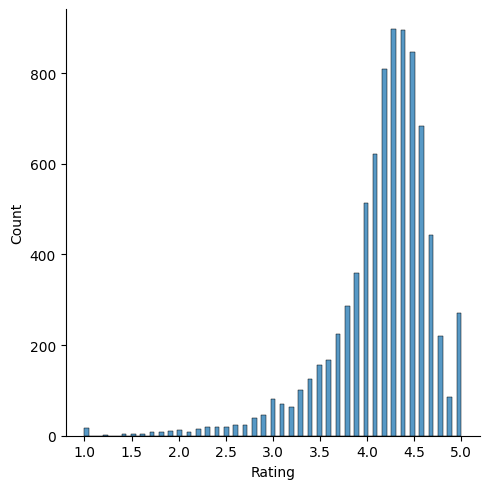

In [80]:
sns.displot(apps.Rating)

### Pairplot

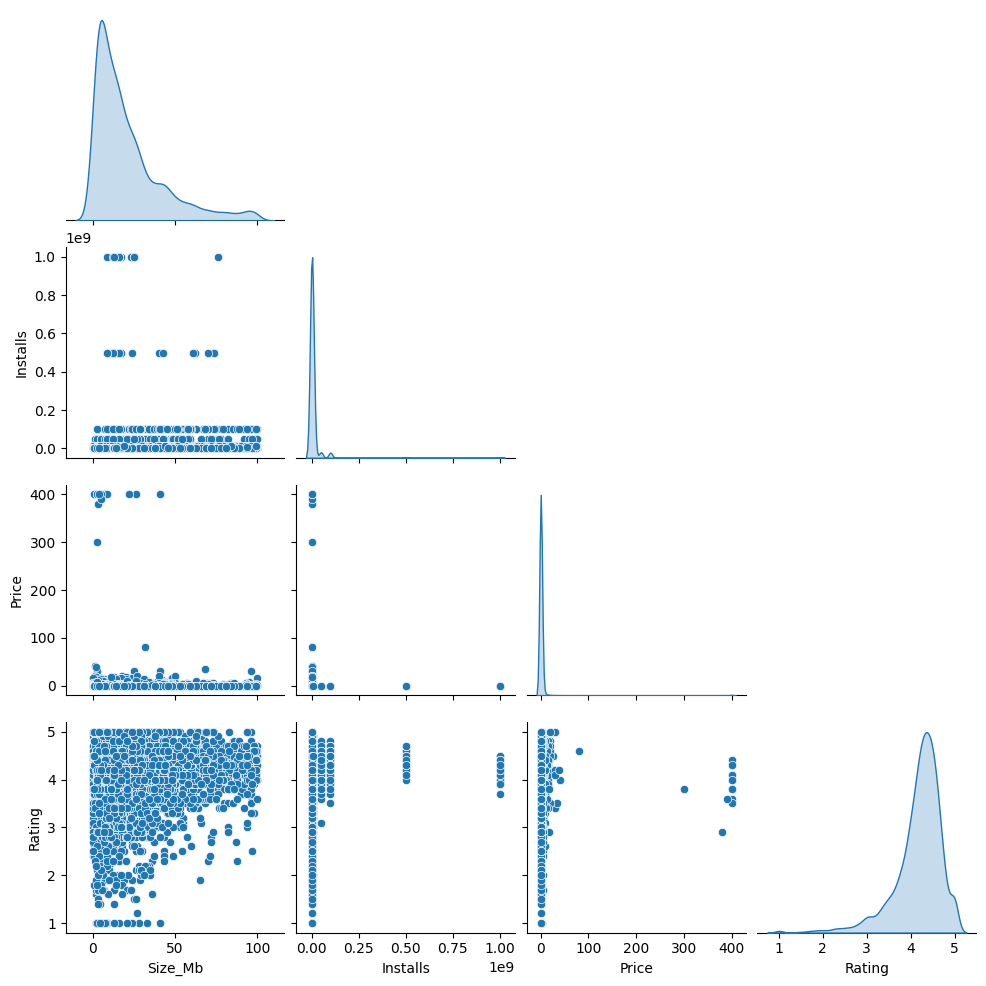

In [81]:
sns.pairplot(apps, corner=True, diag_kind='kde')

### Installs vs Rating

<AxesSubplot: xlabel='Installs', ylabel='Rating'>

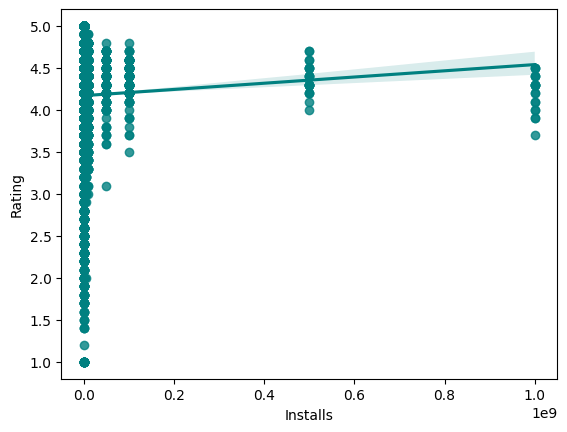

In [82]:
sns.regplot(x="Installs", y="Rating", color = 'teal',data=apps)

Looks like apps with more installs have higher rating. But there is not much apps with >= 10^5 installs so I think this fact is not necessary. TODO: Explore more, run some stat tests

### Type vs Rating

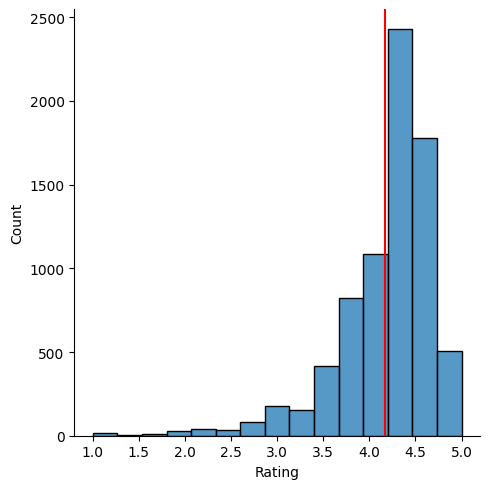

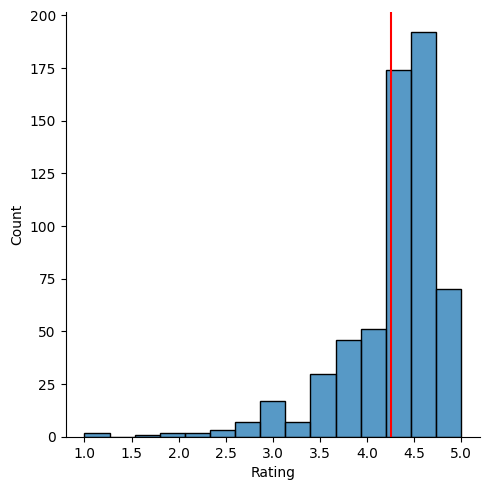

In [83]:
sns.displot(apps[apps.Type == 'Free']['Rating'], bins=15)
plt.axvline(apps[apps.Type == 'Free']['Rating'].mean(), color='red')
sns.displot(apps[apps.Type == 'Paid']['Rating'], bins=15)
plt.axvline(apps[apps.Type == 'Paid']['Rating'].mean(), color='red')

In [84]:
apps[apps.Type == 'Free']['Rating'].mean(), apps[apps.Type == 'Paid']['Rating'].mean()

(4.166372497365648, 4.259602649006623)

TODO: Run a statistical test to check whether there is a statistically significant difference between Free and Paid apps' rating

### Type

([<matplotlib.patches.Wedge at 0x1f8a9ca1300>,
 [Text(-1.070651124323107, 0.2524008121731531, 'Free'),
  Text(1.0706511361388402, -0.2524007620523571, 'Paid')],
 [Text(-0.5839915223580582, 0.1376731702762653, '92.6%'),
  Text(0.5839915288030038, -0.13767314293764932, '7.4%')])

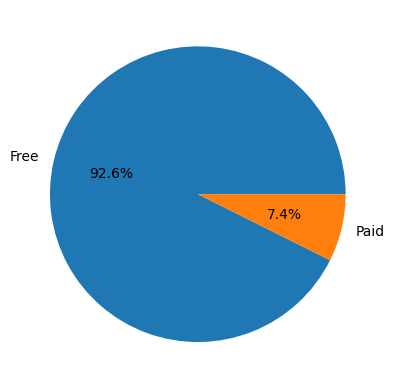

In [85]:
plt.pie(apps['Type'].value_counts(sort=True), labels=apps['Type'].value_counts(sort=True).index, autopct='%1.1f%%')

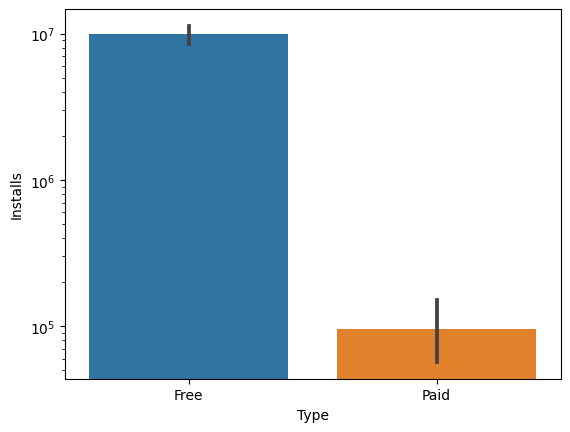

In [86]:
# Obviously, Free apps has much more installs on average
sns.barplot(x=apps.Type, y=apps.Installs)
plt.yscale('log')

### Price vs Rating

<AxesSubplot: xlabel='Price', ylabel='Rating'>

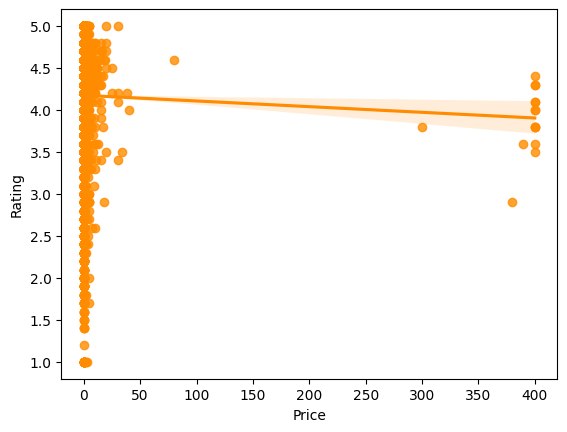

In [87]:
sns.regplot(x="Price", y="Rating", color = 'darkorange',data=apps)

Not sure about significance of this correlation. TODO: Run some stat tests

### Category

<AxesSubplot: xlabel='count', ylabel='Category'>

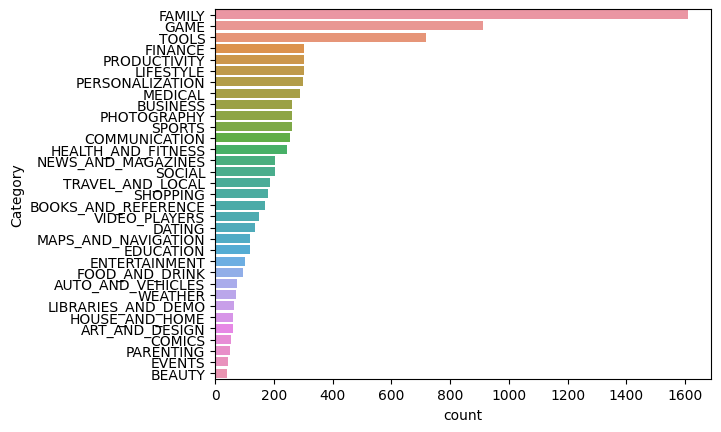

In [88]:
# Most popular categories are family, game, and tools
sns.countplot(y=apps.Category, order=apps['Category'].value_counts().index)

### Rating vs Category

<AxesSubplot: xlabel='Rating', ylabel='Category'>

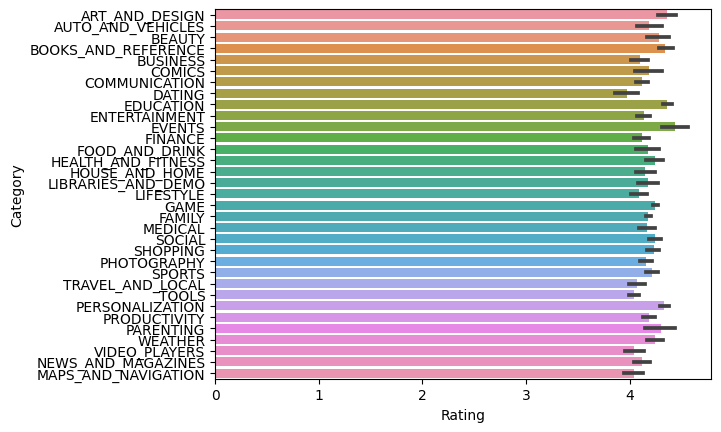

In [89]:
sns.barplot(x=apps.Rating, y=apps.Category)

In [90]:
apps.groupby('Category')['Rating'].mean()

Category
ART_AND_DESIGN         4.357377
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.344970
BUSINESS               4.098479
COMICS                 4.181481
COMMUNICATION          4.121484
DATING                 3.970149
EDUCATION              4.364407
ENTERTAINMENT          4.135294
EVENTS                 4.435556
FAMILY                 4.179664
FINANCE                4.115563
FOOD_AND_DRINK         4.172340
GAME                   4.247368
HEALTH_AND_FITNESS     4.243033
HOUSE_AND_HOME         4.150000
LIBRARIES_AND_DEMO     4.178125
LIFESTYLE              4.093355
MAPS_AND_NAVIGATION    4.036441
MEDICAL                4.166552
NEWS_AND_MAGAZINES     4.121569
PARENTING              4.300000
PERSONALIZATION        4.332215
PHOTOGRAPHY            4.157414
PRODUCTIVITY           4.183389
SHOPPING               4.230000
SOCIAL                 4.247291
SPORTS                 4.216154
TOOLS                  4.039554
TRAVEL_AND_LOCAL       4.069519

C:\Users\Александр\AppData\Local\Temp\ipykernel_7176\718645409.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(apps.corr(), annot=True)


<AxesSubplot: >

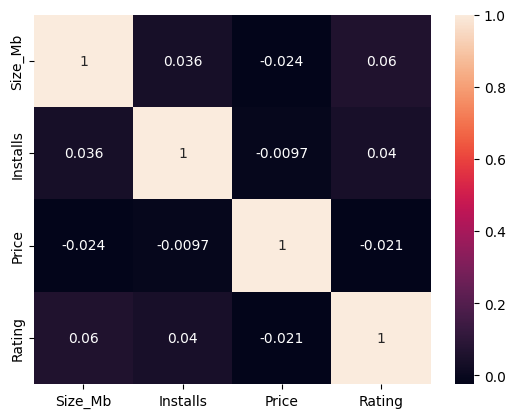

In [92]:
sns.heatmap(apps.corr(), annot=True)